In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
from matplotlib import colormaps
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines
    if dbm is not None:
        specs = {
            key: np.array([v for v in ritz_results[key] if v.imag > dbm]) for key in ritz_results
        }
    else:
        specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(dpi=300)

    ax1 = fig.add_subplot()
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax1.set_ylim(-0.1, 0)
    ax1.axhline(-1/16, linestyle="--", alpha=0.6)
    ax1.axhline(-1/36, linestyle="--", alpha=0.6)
    ax1.axhline(-1/64, linestyle="--", alpha=0.6)
    ax1.axhline(-1/100, linestyle="--", alpha=0.6)
    ax1.axhline(-1/144, linestyle="--", alpha=0.6)
    ax1.axhline(-1/196, linestyle="--", alpha=0.6)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    if x == 0:
        return potential(x+0.0001)
    return -1/x + 2/(x**2)

In [4]:
rusl = {}
vc = {}
for i in tqdm(range(50, 175, 25)):
    rusl[i] = sturm_liouville_halfline(potential, i, 200, np.pi/2)

100%|██████████| 5/5 [01:02<00:00, 12.46s/it]


In [5]:
#plot(rusl)

In [6]:
rusl = sturm_liouville_halfline(potential, 100, 200, np.pi/2)
np.set_printoptions(threshold=np.inf)
print([(i, rusl[i]) for i in range(100) if rusl[i] < 0])

KeyboardInterrupt: 

In [4]:
eigpairs = rusl = sturm_liouville_halfline(potential, 100, 200, np.pi/2, returns='vectors')
ground_state = eigpairs.filter(lambda x: x<-0.06)

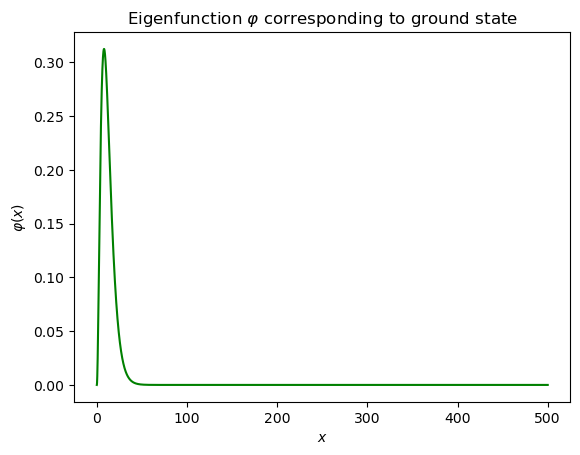

0.059747213451991486

In [9]:
mesh = 15000
from specpol.common import laguerre
def disc_eigfunc(vec):
    def eigfunc(x):
        return sum(weight * laguerre(i, 0, x) * np.exp(-x/2) for i, weight in enumerate(vec, start=0))
    return np.array([eigfunc(x) for x in np.linspace(0, 500, mesh)])

val, vec = list(ground_state.data.items())[0]
plt.plot(np.linspace(0, 500, mesh), disc_eigfunc(vec), color='green')
plt.title(r"Eigenfunction $\varphi$ corresponding to ground state")
plt.xlabel("$x$")
plt.ylabel(r"$\varphi(x)$")
plt.show()

eigfn = disc_eigfunc(vec)
eigfn /= np.trapz(abs(eigfn)**2, dx=500/(mesh-1))**(1/2)
lu = -np.diff(eigfn, n=2, prepend=0, append=0)/(500/(mesh-1)) + np.array([potential(x) for x in np.linspace(0, 500, len(eigfn))])*eigfn
(np.trapz(abs(lu - val.real*eigfn)**2, dx=500/(mesh-1)))**(1/2)

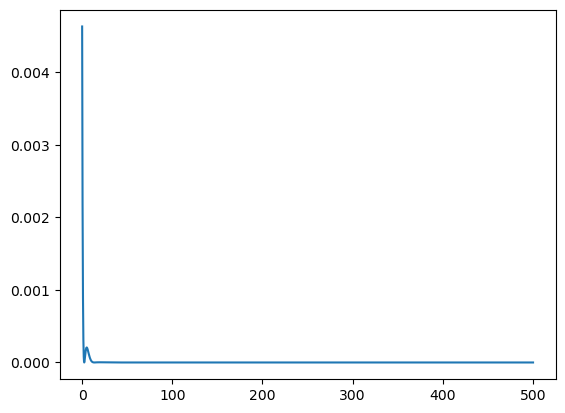

In [8]:
plt.plot(np.linspace(0, 500, mesh)[1:], abs(lu[1:] - val.real*eigfn[1:])**2)

In [12]:
lu

array([ 7.24203846e+01+0.j,  6.76068369e-02+0.j,  6.61134189e-02+0.j, ...,
       -6.34341755e-24+0.j, -6.29659545e-24+0.j,  5.09744146e-20+0.j])